# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Boltzmann" data-toc-modified-id="Boltzmann-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Boltzmann</a></div><div class="lev2 toc-item"><a href="#Pentose-phosphate-+-Glycolysis-+-TCA-cycle" data-toc-modified-id="Pentose-phosphate-+-Glycolysis-+-TCA-cycle-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pentose phosphate + Glycolysis + TCA cycle</a></div><div class="lev2 toc-item"><a href="#Turning-on-Regulation-and-Setting-Enzyme-Levels" data-toc-modified-id="Turning-on-Regulation-and-Setting-Enzyme-Levels-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Turning on Regulation and Setting Enzyme Levels</a></div><div class="lev1 toc-item"><a href="#Models-and-Simulations" data-toc-modified-id="Models-and-Simulations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Models and Simulations</a></div><div class="lev2 toc-item"><a href="#Model-With-Regulation" data-toc-modified-id="Model-With-Regulation-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Model With Regulation</a></div><div class="lev3 toc-item"><a href="#Run-Deterministic-Simulation" data-toc-modified-id="Run-Deterministic-Simulation-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Run Deterministic Simulation</a></div><div class="lev3 toc-item"><a href="#Derivatives-from-ODE-kinetic-rate-law-simulation" data-toc-modified-id="Derivatives-from-ODE-kinetic-rate-law-simulation-212"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Derivatives from ODE kinetic rate law simulation</a></div><div class="lev3 toc-item"><a href="#Forward-and-Reverse-Rates-from-Deterministic-Simulation" data-toc-modified-id="Forward-and-Reverse-Rates-from-Deterministic-Simulation-213"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Forward and Reverse Rates from Deterministic Simulation</a></div><div class="lev2 toc-item"><a href="#Analyze-Metabolite-Levels-from-Deterministic-Simulation" data-toc-modified-id="Analyze-Metabolite-Levels-from-Deterministic-Simulation-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analyze Metabolite Levels from Deterministic Simulation</a></div><div class="lev2 toc-item"><a href="#Reaction-Rates-from-Kinetic-Rate-Law" data-toc-modified-id="Reaction-Rates-from-Kinetic-Rate-Law-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Reaction Rates from Kinetic Rate Law</a></div><div class="lev2 toc-item"><a href="#Calculate-Power" data-toc-modified-id="Calculate-Power-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Calculate Power</a></div><div class="lev3 toc-item"><a href="#Power-Characteristics" data-toc-modified-id="Power-Characteristics-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Power Characteristics</a></div><div class="lev2 toc-item"><a href="#Calculate-Resistance-and-Conductance" data-toc-modified-id="Calculate-Resistance-and-Conductance-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Calculate Resistance and Conductance</a></div>

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import subprocess
import re
import os
from IPython.core.display import display
#from ipynb_latex_setup import *
%matplotlib inline
N_avogadro = 6.022140857e+23
VolCell = 1.0e-15
Concentration2Count = N_avogadro * VolCell
concentration_increment = 1/(N_avogadro*VolCell)
RT = 8.3144598e-03 * 298.15

# Boltzmann
A beta version of the simulation code is available on GitHub at https://github.com/PNNL-CompBio/Boltzmann.
## Pentose phosphate + Glycolysis + TCA cycle
Reactions:

In [215]:
# Uncomment to change to your directory, if needed:
#os.chdir('mydir')
cat /Users/d3k137/docs/projects/boltzmann/code/06212017/run/pentose_phos.glycolysis.tca/neurospora_pentose_phos.glycolysis.tca.2_rate.dat

REACTION	 ME1m
LEFT (S)-MALATE + NAD+
RIGHT pyruvate + NADH + CO2
LEFT_COMPARTMENT MITOCHONDRIA
RIGHT_COMPARTMENT MITOCHONDRIA
ENZYME_LEVEL 0.0
k_FORWARD 0.0
k_REVERSE 0.0
//
REACTION	 ME2m
LEFT (S)-MALATE + NADP+
RIGHT PYRUVATE + NADPH + CO2
LEFT_COMPARTMENT MITOCHONDRIA
RIGHT_COMPARTMENT MITOCHONDRIA
ENZYME_LEVEL 0.0
k_FORWARD 0.0
k_REVERSE 0.0
//
REACTION	 CSm
LEFT OXALOACETATE + ACETYL-COA + H2O
RIGHT CITRATE + COA
LEFT_COMPARTMENT MITOCHONDRIA
RIGHT_COMPARTMENT MITOCHONDRIA
k_FORWARD 3.46538006973e-06
k_REVERSE 6.50610045655e-14
//
REACTION	 ACONTm
LEFT CITRATE
RIGHT ISOCITRATE
LEFT_COMPARTMENT MITOCHONDRIA
RIGHT_COMPARTMENT MITOCHONDRIA
k_FORWARD 1.73623049906e-07
k_REVERSE 2.53743943371e-06
//
REACTION	 ICDHxm
LEFT ISOCITRATE + NAD+
RIGHT 2-OXOGLUTARATE + NADH + CO2
LEFT_COMPARTMENT MITOCHONDRIA
RIGHT_COMPARTMENT MITOCHONDRIA
k_FORWARD 3.85046925276e-12
k_REVERSE 5.28080915281e-12
//
REACTION	 AKGDm
LEFT 2-OXOGLUTARATE + COA + NAD+
RIGHT SUCCINYL-COA + CO2 + NADH
LEFT_COMPARTMEN

## Turning on Regulation and Setting Enzyme Levels
To use regulation in the simulation, this flag must be set in the input (*.in) file:

USE_REGULATION 1

If USE_REGULATION is set to 0, then the regulation information in the .dat file will be ignored.

Reactions can be turned on (1.0) or off (0.0) by setting the ENZYME_LEVEL feature in the .dat file for a reaction:

USE_ENZYME_LEVELS 1.0 

or

USE_ENZYME_LEVELS 0.0

**In addition, USE_ACTIVITY 1" must be set in the input (*.in):**

In [216]:
cat /Users/d3k137/docs/projects/boltzmann/code/06212017/run/pentose_phos.glycolysis.tca/neurospora_pentose_phos.glycolysis.tca_reg_rate.in

RXN_FILE neurospora_pentose_phos.glycolysis.tca.2_rate.dat
INIT_FILE neurospora_pentose_phos.glycolysis.tca.2_reg.rstrt
LOG_FILE neurospora_pentose_phos.glycolysis.tca.2_reg_rate.log
OUT_FILE neurospora_pentose_phos.glycolysis.tca.2_reg_rate.out
USE_DEQ 1
NO_ROUND_FROM_DEQ 1
ODE_T_FINAL 10000000
ODE_T_FINAL 10
ODE_T_FINAL 0.01
ODE_T_FINAL 1000.0
DELTA_CONCS_CHOICE 9
ODE_RXN_VIEW_FREQ 1000
ODE_RXN_VIEW_FREQ 1
DERIV_THRESH  5.0e-17
WARMUP_STEPS 00000000
RECORD_STEPS 000000
TEMP_KELVIN 298.15
PH 7.0
IONIC_STRENGTH 0.15
PRINT_OUTPUT 2
CONCS_OR_COUNTS 3
RXN_VIEW_FREQ 100
COUNT_VIEW_FREQ 100
LKLHD_VIEW_FREQ 100
USE_BULK_WATER 1
USE_REGULATION 1
USE_ENZYME_LEVELS 1
USE_PSEUDOISOMERS 1
USE_DGZERO 1
USE_ACTIVITIES 1
NUM_METABOLIC_GROUPS 1


# Models and Simulations

## Model With Regulation
### Run Deterministic Simulation

In [217]:
#args = ("/Users/d3k137/docs/projects/boltzmann/code/06292017/src_original/boltzmann", "pentose_phos.glycolysis.tca.in")
#args = ("/Users/d3k137/docs/projects/boltzmann/code/10182017/src/boltzmann", "neurospora_pentose_phos.glycolysis.tca_reg_rate.in")
#args = ("/Users/d3k137/docs/projects/boltzmann/code/11112017/src/boltzmann", "neurospora_pentose_phos.glycolysis.tca_reg_rate.in")
#args = ("/Users/d3k137/docs/projects/boltzmann/code/12042017/src/boltzmann", "neurospora_pentose_phos.glycolysis.tca_reg_rate.in")

#Or just:
#args = "bin/bar -c somefile.xml -d text.txt -r aString -f anotherString".split()
#popen = subprocess.Popen(args, stdout=subprocess.PIPE)
#popen.wait()
#output = popen.stdout.read()
#print(output)

### Derivatives from ODE kinetic rate law simulation

(S)-MALATE:CYTOSOL                           0.000000e+00
SEDOHEPTULOSE_7-PHOSPHATE:CYTOSOL            0.000000e+00
(S)-MALATE:GLYOXYSOME                        0.000000e+00
ACETYL-COA:GLYOXYSOME                        0.000000e+00
COA:GLYOXYSOME                               0.000000e+00
GLYOXYLATE:GLYOXYSOME                        0.000000e+00
ISOCITRATE:GLYOXYSOME                        0.000000e+00
SUCCINATE:GLYOXYSOME                         0.000000e+00
(S)-MALATE:MITOCHONDRIA                      0.000000e+00
2-OXOGLUTARATE:MITOCHONDRIA                  0.000000e+00
ACETYL-COA:MITOCHONDRIA                      0.000000e+00
ADP:MITOCHONDRIA                             0.000000e+00
ATP:MITOCHONDRIA                             0.000000e+00
PYRUVATE:CYTOSOL                             0.000000e+00
CITRATE:MITOCHONDRIA                         0.000000e+00
COA:MITOCHONDRIA                             0.000000e+00
FUMARATE:MITOCHONDRIA                        0.000000e+00
ISOCITRATE:MIT

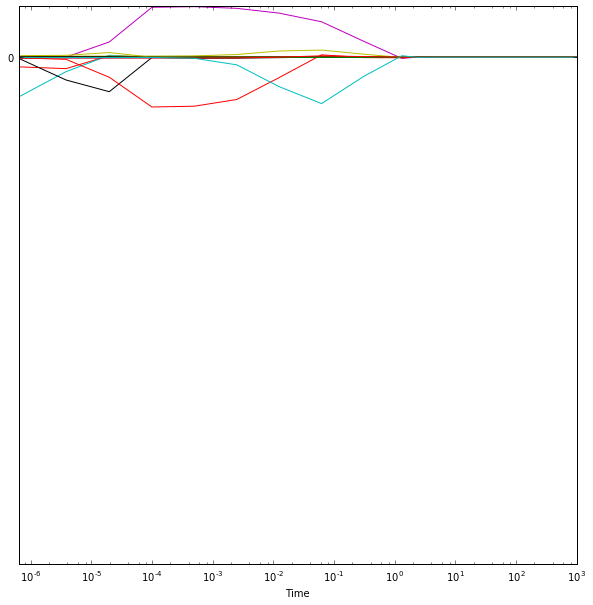

In [218]:
# Read boltzmann derivatives
ode_derivatives = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_reg_rate.ode_dconcs',header=0,index_col=0)
derivatives = np.abs(ode_derivatives.iloc[-1,:])
display(derivatives.sort_values())
plt.figure();ode_derivatives.plot(legend=False,logx=True,logy=False,figsize=(10, 10))

plt.yscale('symlog')
#plt.legend(bbox_to_anchor=(1.35, 1.05),bbox_transform=plt.gcf().transFigure)


### Forward and Reverse Rates from Deterministic Simulation

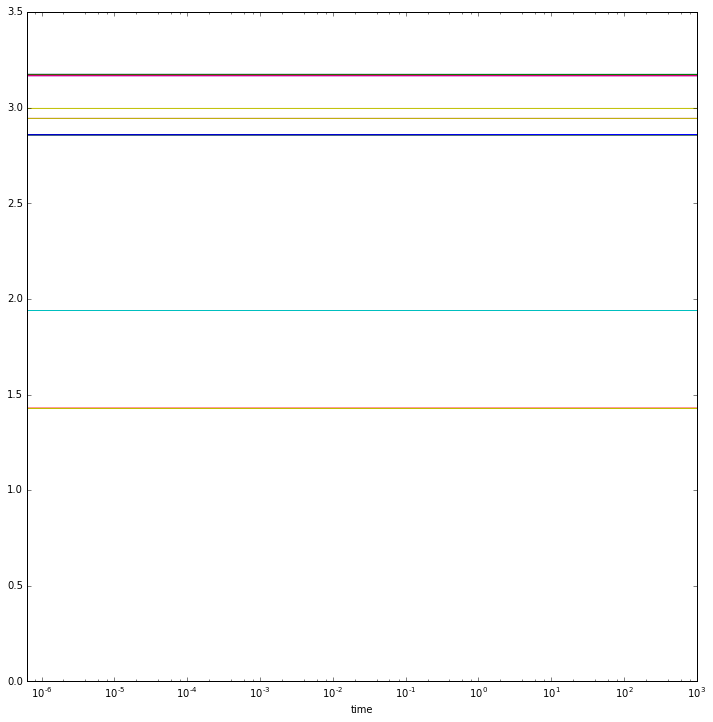

In [219]:
# Read boltzmann ODE reaction odds
ode_likelihoods_timeseries = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_reg_rate.ode_lklhd',header=1, index_col = 0, quoting=2)

temp = [x for x in ode_likelihoods_timeseries.columns if 'f_' in x]
ode_fwd_likelihoods_timeseries = ode_likelihoods_timeseries[temp]
temp = [x for x in ode_likelihoods_timeseries.columns if 'r_' in x]
ode_rev_likelihoods_timeseries = ode_likelihoods_timeseries[temp]
ode_fwd_likelihoods_timeseries.columns = [x.split("f_")[-1] for x in ode_fwd_likelihoods_timeseries.columns]
ode_rev_likelihoods_timeseries.columns = [x.split("r_")[-1] for x in ode_rev_likelihoods_timeseries.columns]
fwd_column = ode_likelihoods_timeseries.iloc[:,fwd_column_idx].columns
rev_column = ode_likelihoods_timeseries.iloc[:,rev_column_idx].columns

plt.figure()
#ode_likelihoods.iloc[:,rev_column_idx].plot(legend=True,logx=True,figsize=(12, 12))
ode_fwd_likelihoods_timeseries.plot(legend=False,logx=True,figsize=(12, 12))
#plt.yscale('symlog')
#plt.legend(bbox_to_anchor=(1.02, 0.9),bbox_transform=plt.gcf().transFigure)

In [220]:
ode_likelihoods_steadystate = pd.DataFrame(data = ode_fwd_likelihoods_timeseries.iloc[-20:].mean(), 
                                           index = ode_fwd_likelihoods_timeseries.columns,
                                          columns =['Forward'])
ode_likelihoods_steadystate['Reverse'] = ode_rev_likelihoods_timeseries.iloc[-20:].mean()
ode_likelihoods_steadystate['For-Rev'] = ode_likelihoods_steadystate['Forward'] - ode_likelihoods_steadystate['Reverse']
ode_likelihoods_steadystate['Rxn Probabilities'] = ode_likelihoods_steadystate['For-Rev']/np.sum(abs(ode_likelihoods_steadystate['For-Rev']))
ode_likelihoods_steadystate

,Forward,Reverse,For-Rev,Rxn Probabilities
ME1m,0.000000,0.000000e+00,0.000000,0.000000
ME2m,0.000000,0.000000e+00,0.000000,0.000000
CSm,3.167759,3.099478e-01,2.857811,0.057144
ACONTm,3.172947,3.151333e-01,2.857814,0.057144
ICDHxm,2.943089,8.531388e-02,2.857775,0.057144
AKGDm,2.943124,8.532100e-02,2.857803,0.057144
SUCOASm,3.172931,3.151645e-01,2.857766,0.057143
SUCD1m,3.172834,3.151739e-01,2.857660,0.057141
FUMm,3.172531,3.152049e-01,2.857326,0.057135
MDHm,3.167089,3.108204e-01,2.856269,0.057113


In [221]:
from escher import Builder

reaction_data = ode_likelihoods_steadystate['For-Rev'].to_dict()
b = Builder(map_name="iMM904.compact_Glycolysis_TCA_PPP.json",reaction_data=reaction_data)
b.display_in_notebook(menu='zoom')
#b.display_in_browser(menu='all')

## Analyze Metabolite Levels from Deterministic Simulation

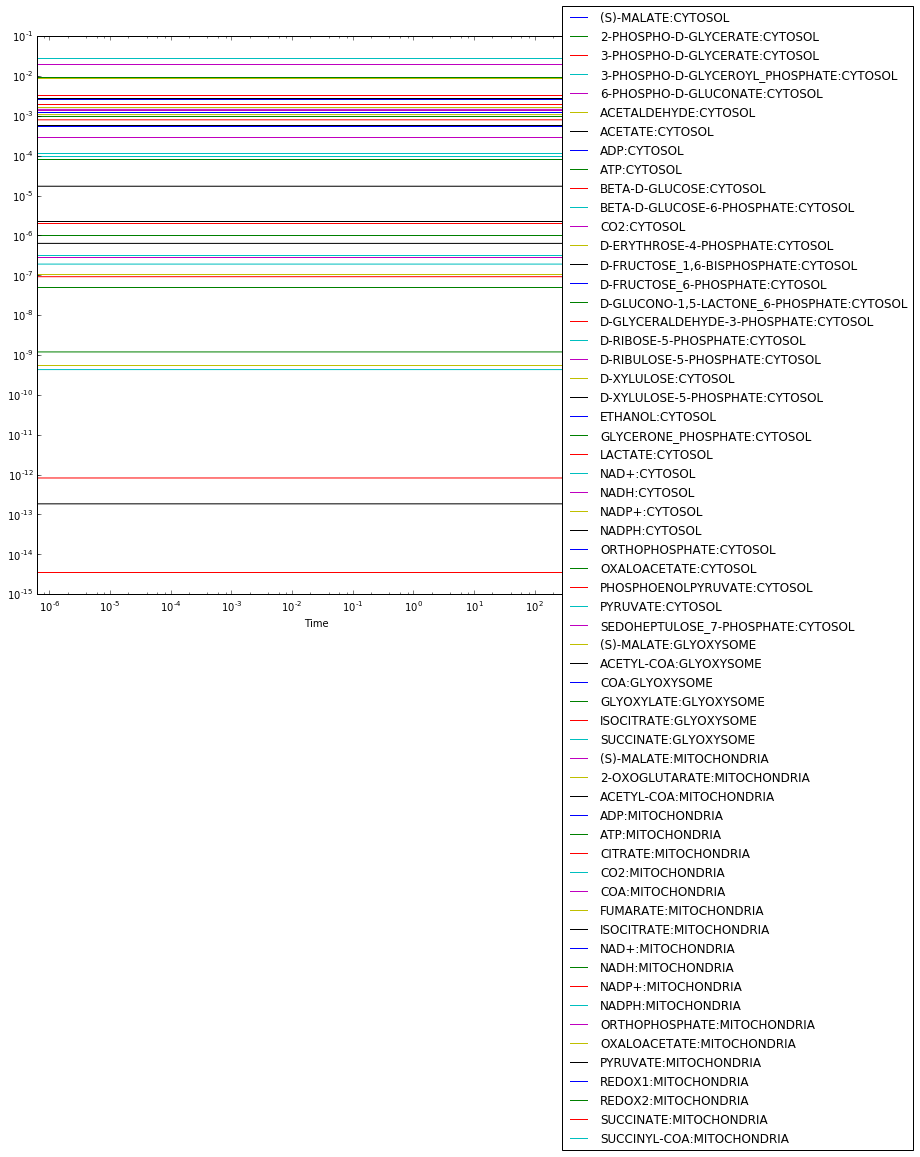

In [222]:
# Read boltzmann stochastic reaction likelihoods
ode_metabolites = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_reg_rate.ode_concs',header=0,index_col=0)

plt.figure();ode_metabolites.plot(legend=False,logx=True,logy=True,figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.35, 0.95),bbox_transform=plt.gcf().transFigure)

In [223]:
#ode_metabolites_steadystate = pd.DataFrame()
ode_metabolites_steadystate = \
  pd.DataFrame(data = ode_metabolites.iloc[-20:,:].mean(axis=0),columns=['Mean'])
ode_metabolites_steadystate['CV'] = \
  pd.DataFrame(data = ode_metabolites.iloc[-20:,:].var(axis=0)/ode_metabolites.iloc[-20:,:].mean(axis=0),columns=['ODE'])
ode_metabolites_steadystate['Ratio'] = \
  pd.DataFrame(data =(ode_metabolites.iloc[-1]/ode_metabolites.iloc[0]))
ode_metabolites_steadystate['Counts'] = ode_metabolites_steadystate['Mean']*Concentration2Count
display(ode_metabolites_steadystate)

,Mean,CV,Ratio,Counts
(S)-MALATE:CYTOSOL,1.700000e-03,2.911441e-35,1.000000,1.023764e+06
2-PHOSPHO-D-GLYCERATE:CYTOSOL,1.198391e-09,1.502514e-40,0.999983,7.216879e-01
3-PHOSPHO-D-GLYCERATE:CYTOSOL,9.246002e-08,0.000000e+00,0.999983,5.568073e+01
3-PHOSPHO-D-GLYCEROYL_PHOSPHATE:CYTOSOL,1.915081e-07,0.000000e+00,0.999986,1.153289e+02
6-PHOSPHO-D-GLUCONATE:CYTOSOL,0.000000e+00,NaN,NaN,0.000000e+00
ACETALDEHYDE:CYTOSOL,0.000000e+00,NaN,NaN,0.000000e+00
ACETATE:CYTOSOL,0.000000e+00,NaN,NaN,0.000000e+00
ADP:CYTOSOL,5.600000e-04,2.209576e-35,1.000000,3.372399e+05
ATP:CYTOSOL,9.600000e-03,0.000000e+00,1.000000,5.781255e+06
BETA-D-GLUCOSE:CYTOSOL,2.000000e-03,3.959560e-34,1.000000,1.204428e+06


## Reaction Rates from Kinetic Rate Law
Check to see that the rates calculated from the usual mass action rate law using rate constants is the same as the rates calculated above from thermodynamic odds.

Since the rate constants were determined from the net reaction probabilities determined from the maximum entropy distribution modified by including regulation, the flux values from the kinetic rate law calculated below should be compared to those net reaction probabilities.

In [224]:
# Read in rates constants:
reaction_df = pd.DataFrame()
filename = 'neurospora_pentose_phos.glycolysis.tca.2_rate.dat'
with open(filename,'r') as f:
  for line in f:
     #print(line)
     if re.match('^REACTION', line):
        temp = re.split('\s',line,1)
        rxn_name = temp[1].strip()
        if not rxn_name:            
          print("Error: Reaction name not found:\n", line)
     elif re.match('^COMMENT',line):
        continue
     elif re.match(r'//',line):
        continue
     elif re.match('^#',line):
        continue
     else:
        #print(line)
        rxn_pair = re.split('\s',line,1)
        reaction_df.loc[rxn_pair[0],rxn_name] = rxn_pair[1].strip()
        
     # end if
  # end for loop
# end with loop
reaction_df = reaction_df.T
reaction_df['k_FORWARD'] = reaction_df['k_FORWARD'].astype(np.float64)
reaction_df['k_REVERSE'] = reaction_df['k_REVERSE'].astype(np.float64)
del reaction_df['DGZERO-UNITS']
del reaction_df['DGZERO']
del reaction_df['COMMNENT']
del reaction_df['PATHWAY']

# Read in stoichiometric matrix and get reactant and product matrices
S = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_reg_rate.mat',header=0, index_col = 0, quoting=2)
P = (S>0)
R = S < 0
del P['forward reaction']
del R['forward reaction']

P = P.astype(np.float64)
R = R.astype(np.float64)

# Calculate rates:
# v_{f} = exp(log(k_f) + R log C)
# v_{r} = exp(log(k_r) + P log C)
# v_{net} = v_{f} - v_{r} 
reactant_concentrations = R.multiply(ode_metabolites_steadystate['Counts'],axis=1)
reactant_concentrations[reactant_concentrations == 0] = 1
reactant_concentrations_rxns = (reactant_concentrations.T).product()

product_concentrations = P.multiply(ode_metabolites_steadystate['Counts'],axis=1)
product_concentrations[product_concentrations == 0] = 1
product_concentrations_rxns = (product_concentrations.T).product()

reaction_df['Fwd Rate'] = reaction_df['k_FORWARD'].multiply(reactant_concentrations_rxns)
reaction_df['Rev Rate'] = reaction_df['k_REVERSE'].multiply(product_concentrations_rxns)
reaction_df['Net Rate'] = reaction_df['Fwd Rate']-reaction_df['Rev Rate']
display(reaction_df)

,LEFT,RIGHT,LEFT_COMPARTMENT,RIGHT_COMPARTMENT,ENZYME_LEVEL,k_FORWARD,k_REVERSE,NREGULATION,Fwd Rate,Rev Rate,Net Rate
ME1m,(S)-MALATE + NAD+,pyruvate + NADH + CO2,MITOCHONDRIA,MITOCHONDRIA,0.0,0.000000e+00,0.000000e+00,NaN,0.000000,0.000000e+00,0.000000
ME2m,(S)-MALATE + NADP+,PYRUVATE + NADPH + CO2,MITOCHONDRIA,MITOCHONDRIA,0.0,0.000000e+00,0.000000e+00,NaN,0.000000,0.000000e+00,0.000000
CSm,OXALOACETATE + ACETYL-COA + H2O,CITRATE + COA,MITOCHONDRIA,MITOCHONDRIA,NaN,3.465382e-06,6.506103e-14,NaN,0.083502,2.635982e-02,0.057142
ACONTm,CITRATE,ISOCITRATE,MITOCHONDRIA,MITOCHONDRIA,NaN,1.736230e-07,2.537439e-06,NaN,0.083435,2.629331e-02,0.057142
ICDHxm,ISOCITRATE + NAD+,2-OXOGLUTARATE + NADH + CO2,MITOCHONDRIA,MITOCHONDRIA,NaN,3.850469e-12,5.280809e-12,NaN,0.062472,5.330270e-03,0.057142
AKGDm,2-OXOGLUTARATE + COA + NAD+,SUCCINYL-COA + CO2 + NADH,MITOCHONDRIA,MITOCHONDRIA,NaN,1.955165e-13,5.564560e-19,NaN,0.086548,2.940566e-02,0.057142
SUCOASm,SUCCINYL-COA + ADP + Orthophosphate,SUCCINATE + ATP + COA,MITOCHONDRIA,MITOCHONDRIA,NaN,1.170119e-21,2.617611e-21,NaN,0.083439,2.629715e-02,0.057142
SUCD1m,SUCCINATE + redox1,FUMARATE + redox2,MITOCHONDRIA,MITOCHONDRIA,NaN,6.722371e-14,6.722371e-14,NaN,0.083440,2.629826e-02,0.057142
FUMm,FUMARATE + H2O,(S)-MALATE,MITOCHONDRIA,MITOCHONDRIA,NaN,1.284522e-07,2.992414e-08,NaN,0.083444,2.630200e-02,0.057142
MDHm,(S)-MALATE + NAD+,OXALOACETATE + NADH,MITOCHONDRIA,MITOCHONDRIA,NaN,6.024654e-14,8.161378e-09,NaN,0.082913,2.577115e-02,0.057142


## Calculate Power

### Power Characteristics
For complex systems such as biological systems, the power is the change in free energy with respect to time. After one hour when the growth rate $\dot{\xi} = 1 hr^{-1}$, a full stoichiometric quantity of cells is produced according to Eqn \ref{biomass1} and \ref{biomass2}. The growth rate is the change in the extent of the reaction $\xi$ with time such that the growth rate $\dot{\xi} = \frac{d\xi}{dt}$. The power consumption of a cell can then be expressed in terms of the reaction affinity $A$ and the extent of the reaction $\xi$,
\begin{eqnarray}
P & = & -\frac{dG}{dt} \\
  & = & -\frac{dG}{d\xi}\frac{d\xi}{dt} \\
  & = & A\frac{d\xi}{dt} \\
\label{power3}
\end{eqnarray}
Since the system is at steady state, $P_{avg} = A\cdot \dot{\xi}$ as well. This relationship is useful for comparing different chemical processes, as will be seen below. 


In [225]:
S = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_reg_rate.amat',header=0, index_col = 0, quoting=2)
R = (S<0)
P = S>0
del R['forward reaction']
del P['forward reaction']
del S['forward reaction']
#S['H2O:CYTOSOL'] =0
#S['H2O:GLYOXYSOME'] =0
#S['H2O:MITOCHONDRIA'] =0

volume_coeff = S.sum(axis=1)

R = R.astype(np.float64)
P = P.astype(np.float64)

steadyState_counts = ode_metabolites_steadystate['Mean']*Concentration2Count

reactant_counts = R.multiply(steadyState_counts,axis=1)
reactant_concs =  R.multiply(ode_metabolites_steadystate['Mean'])
product_counts = P.multiply(steadyState_counts,axis=1)
product_concs = P.multiply(ode_metabolites_steadystate['Mean'])

product_counts_incremented = product_counts + P.multiply(1)
product_concs_incremented = product_concs + P.multiply(concentration_increment)
product_counts = product_counts #+ P.multiply(1)
product_concs = product_concs #+ P.multiply(concentration_increment)

# Take the product of counts of all reactants for a reaction
reactant_counts_rxns = (reactant_counts[reactant_counts != 0].T).product()
reactant_concs_rxns = (reactant_concs[reactant_concs != 0].T).product()

# Take the product of counts of all products for a reaction
product_counts_rxns = (product_counts[product_counts != 0].T).product()
product_concs_rxns = (product_concs[product_concs != 0].T).product()
product_counts_incremented_rxns = (product_counts_incremented[product_counts_incremented != 0].T).product()
product_concs_incremented_rxns = (product_concs_incremented[product_concs_incremented != 0].T).product()
#denominator = reactant_counts_rxns.multiply(1-ode_likelihoods_steadystate['Reverse'])

K_eq = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_reg_rate.dg0ke',header=0, index_col = 0, quoting=2)

result = pd.DataFrame()
result['Boltzmann Ke'] = K_eq['Ke']
# Notice that Computed L_fwd uses incremented product counts. That is so we can compare to Boltzmann values
# when calculating the activities. That is, these need to use the same formula.
result['Computed L_fwd'] = result['Boltzmann Ke'].multiply(reactant_counts_rxns.divide(product_counts_incremented_rxns))

idx = np.abs(ode_likelihoods_steadystate['For-Rev']) > 0
DeltaG = "$\Delta G$"
ode_likelihoods_steadystate[DeltaG] = np.nan
ode_likelihoods_steadystate['Power'] = np.nan
ode_likelihoods_steadystate[DeltaG][idx] = -RT*np.log(result['Computed L_fwd'][idx])
ode_likelihoods_steadystate['Power'][idx] = ode_likelihoods_steadystate['For-Rev'][idx]*np.log(result['Computed L_fwd'][idx])
display(ode_likelihoods_steadystate.loc[idx,:])

,Forward,Reverse,For-Rev,Rxn Probabilities,$\Delta G$,Power
CSm,3.167759,3.099478e-01,2.857811,0.057144,-2.858297,3.295126
ACONTm,3.172947,3.151333e-01,2.857814,0.057144,-2.862354,3.299805
ICDHxm,2.943089,8.531388e-02,2.857775,0.057144,-2.675933,3.084853
AKGDm,2.943124,8.532100e-02,2.857803,0.057144,-2.675962,3.084917
SUCOASm,3.172931,3.151645e-01,2.857766,0.057143,-2.862340,3.299736
SUCD1m,3.172834,3.151739e-01,2.857660,0.057141,-2.862265,3.299526
FUMm,3.172531,3.152049e-01,2.857326,0.057135,-2.862029,3.298868
MDHm,3.167089,3.108204e-01,2.856269,0.057113,-2.857773,3.292744
GAPD,2.857815,7.730477e-07,2.857814,0.057144,-2.603046,3.000868
PGK,3.165479,3.076658e-01,2.857813,0.057144,-2.856512,3.293071


In [226]:
idx = ode_likelihoods_steadystate.isnull()['Power']
ode_likelihoods_steadystate.loc[idx,'Power'] = 0.0
reaction_data = ode_likelihoods_steadystate['Power'].to_dict()
b = Builder(map_name="iMM904.compact_Glycolysis_TCA_PPP.json",reaction_data=reaction_data)
b.display_in_notebook(menu='zoom')

Since the free energy change is negative, each reaction will have a negative resistance. Each reaction is actually a small battery, in a sense.

A regulated reaction that has a large favorable free energy change relative to other reactions at steady state, will act as a potentiometer.  That is, one could increase the flux by changing the extent of the regulation. 

## Calculate Resistance and Conductance
G = J/V or flux/$\Delta G$.


In [227]:
idx = np.abs(ode_likelihoods_steadystate['For-Rev']) > 0
ode_likelihoods_steadystate['Resistance'] = np.nan
ode_likelihoods_steadystate['Conductance'] = np.nan
ode_likelihoods_steadystate['Conductance'][idx] = ode_likelihoods_steadystate['For-Rev'][idx]/((-1)*np.log(result['Computed L_fwd'][idx]))
ode_likelihoods_steadystate['Resistance'][idx] = ((1)*np.log(result['Computed L_fwd'][idx]))/ode_likelihoods_steadystate['For-Rev'][idx]

idx = ode_likelihoods_steadystate.notna()['Resistance']
#ode_likelihoods_steadystate.loc[idx,'Resistance'] = np.inf
reaction_data = ode_likelihoods_steadystate.loc[idx,'Resistance'].to_dict()

b = Builder(map_name="iMM904.compact_Glycolysis_TCA_PPP.json",reaction_data=reaction_data)
b.display_in_notebook(menu='zoom')


The next snippet of code generates the data needed for construction of Figure 4 in the manuscript, which is made using Pathway Tools from SRI.

In [228]:
biocyc_frames = pd.read_table('power_energy_characteristics.tab',header=0, index_col = 0, quoting=2)
biocyc_frames.set_index(['Reaction'],append=True,inplace=True)
biocyc_frames = biocyc_frames.swaplevel(axis=0)
display(biocyc_frames)

biocyc_frames = biocyc_frames.swaplevel(axis=0)
biocyc_frames.to_csv('power_energy_characteristics2.txt', sep='\t', columns = ['Energy','Power','Resistance','Flux'])

Energy      Power  \
Reaction FrameId                                                       
CSm      CITSYN-RXN                             -1.153025   3.295129   
ACONTm   ACONITATEDEHYDR-RXN                    -1.154661   3.299805   
         ACONITATEHYDR-RXN                      -1.154661   3.299805   
ICDHxm   ISOCITRATE-DEHYDROGENASE-NAD+-RXN      -1.079460   3.084853   
AKGDam   2OXOGLUTARATEDEH-RXN                   -1.079472   3.084917   
SUCOASm  SUCCCOASYN-RXN                         -1.154656   3.299736   
SUCD1m   SUCCINATE-DEHYDROGENASE-UBIQUINONE-RXN -1.154625   3.299526   
FUMm     FUMHYDR-RXN                            -1.154530   3.298868   
MDHm     MALATE-DEH-RXN                         -1.152814   3.292751   
GAPD     GAPOXNPHOSPHN-RXN                      -1.050057   3.000868   
PGK      PHOSGLYPHOS-RXN                        -1.152304   3.293071   
TPI      TRIOSPISOMERIZATION-RXN                -0.356911   0.509993   
FBA      F16ALDOLASE-RXN                        -0.356911   0.509992   
PYK      PEPDEPHOS-RXN                          -1.050056   3.000825   
PGM      3PGAREARR-RXN                          -1.097031   3.135079   
ENO      2PGADEHYDRAT-RXN                       -1.050065   3.000840   
HEX1     GLUCOKIN-RXN                           -0.356910  18.116184   
PGI      PGLUCISOM-RXN                          -0.664467   0.949462   
PFK      6PFRUCTPHOS-RXN                        -0.356910   1.116184   
PYRt2m   TRANS-RXN2T-215                        -1.050043   3.000774   
PDHm     PYRUVDEHY-RXN                          -1.050485   3.003334   

                                                 Resistance      Flux  
Reaction FrameId                                                       
CSm      CITSYN-RXN                                0.403464  2.857812  
ACONTm   ACONITATEDEHYDR-RXN                       0.404036  2.857814  
         ACONITATEHYDR-RXN                         0.404036  2.857814  
ICDHxm   ISOCITRATE-DEHYDROGENASE-NAD+-RXN         0.377727  2.857775  
AKGDam   2OXOGLUTARATEDEH-RXN                      0.377728  2.857803  
SUCOASm  SUCCCOASYN-RXN                            0.404041  2.857766  
SUCD1m   SUCCINATE-DEHYDROGENASE-UBIQUINONE-RXN    0.404046  2.857660  
FUMm     FUMHYDR-RXN                               0.404060  2.857326  
MDHm     MALATE-DEH-RXN                            0.403608  2.856273  
GAPD     GAPOXNPHOSPHN-RXN                         0.367434  2.857814  
PGK      PHOSGLYPHOS-RXN                           0.403212  2.857813  
TPI      TRIOSPISOMERIZATION-RXN                   0.249779  1.428907  
FBA      F16ALDOLASE-RXN                           0.249779  1.428906  
PYK      PEPDEPHOS-RXN                             0.367438  2.857776  
PGM      3PGAREARR-RXN                             0.383875  2.857784  
ENO      2PGADEHYDRAT-RXN                          0.367443  2.857765  
HEX1     GLUCOKIN-RXN                              8.872761  1.428907  
PGI      PGLUCISOM-RXN                             0.465017  1.428908  
PFK      6PFRUCTPHOS-RXN                           8.872761  1.428907  
PYRt2m   TRANS-RXN2T-215                           0.367435  2.857765  
PDHm     PYRUVDEHY-RXN                             0.367431  2.858998